## Load and analyze Dataset

In [260]:
import numpy as np
import pandas as pd

In [261]:
df = pd.read_csv('tweet_data.csv')

In [262]:
#Use the sample method to look at some random tweets present in our dataset
df.sample(10)

,textID,tweet_text,sentiment
526,1957211597,Its so Fucking hot! Damn no air conditioning.,negative
6447,1964129416,"@DChi606 Sadly, all I have is the Stanley Stee...",negative
12221,1695282010,The sun is shining Have a great day,positive
1559,1957745868,What a gorgeous day!! And I'm going to be stuc...,positive
9543,1693976075,C-News wasn't as bad as I expected... could ha...,positive
602,1957251799,3am i still cant sleep,negative
4213,1962319886,@SuprnaturlShana but he looks so much better w...,positive
12504,1695511754,its 35 now. ilycecily &lt;3,positive
6524,1964217768,@Blo0dsta1ned i know my mom is going up there ...,negative
9034,1966166958,i miss my puppies...,negative


In [263]:
#Check how many tweets there are in total
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [264]:
#Print tweet and its Sentiment based on a tweet ID
tweet_id = 4879
tweet = df.iloc[tweet_id]
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


## Data Visualisation

In [265]:
import matplotlib.pyplot as plt

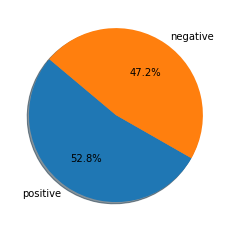

In [266]:
#understanding how tweets are distributed over the dataset
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [267]:
#print count of positive and negative tweets
print("Number of Positive tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of Negative tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of Positive tweets: 9897
Number of Negative tweets: 8830


### Wordclouds

In [268]:
from wordcloud import WordCloud

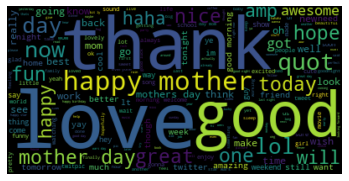

In [269]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

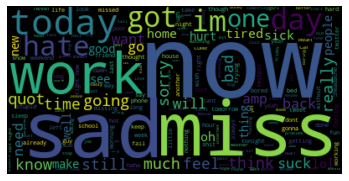

In [270]:
neg_tweets = df[df["sentiment"]=="negative"]
txt1 = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [271]:
tweet = "RT @AIOutsider I love this!👍 https://AIOutsider.com #NLP Fun"

## Text Normalization

In [272]:
import re

### Handle RT Tag

In [273]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

In [274]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this!👍 https://AIOutsider.com #NLP Fun


### @User Tag

In [275]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

In [276]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this!👍 https://AIOutsider.com #NLP Fun


### Emojis

In [277]:
pip install emoji --upgrade

Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [278]:
import emoji

In [279]:
def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [280]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this!:thumbs_up: https://AIOutsider.com #NLP Fun


### URLs

In [281]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

In [282]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this!👍  #NLP Fun


### Hashtags

In [283]:
def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

In [284]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this!👍 https://AIOutsider.com NLP Fun


## Word Features

In [285]:
tweet = "LOOOOOOOOOK at this .... I'd like it so much!"

### Remove upper capitalization

In [286]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [287]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: loooooooook at this .... i'd like it so much!


### Word Repetition

In [288]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

In [289]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


### Punctuation Repetition

In [290]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace, tweet)
    return tweet

In [291]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOOK at this . I'd like it so much!


### Word Contraction

In [292]:
pip install contractions

In [293]:
import contractions

In [294]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'can not', "can't've": 'can not have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are',

In [295]:
#Method 1
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k,v)
  return tweet

In [296]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOOK at this .... I would like it so much!


In [297]:
#Method 2
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [298]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOOK at this .... I would like it so much!


## Tokenization

In [299]:
pip install nltk

### Easy Tokenization

In [300]:
import nltk
from nltk.tokenize import word_tokenize

In [301]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [302]:
tweet = "There are 5 different words!"

In [303]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [304]:
print(type(tokenize(tweet)))

<class 'list'>


In [305]:
print("Tweet tokens: {}".format(tokenize(tweet)))

Tweet tokens: ['There', 'are', '5', 'different', 'words', '!']


### Custom Tokenization

In [306]:
import string

In [307]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [308]:
from nltk.corpus import stopwords

In [309]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [310]:
# Create set of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'we', "wouldn't", 'do', 'our', 'being', 'about', 'how', 'at', 'any', 'me', "it's", 'is', 'such', 'himself', 'until', 'was', 'yours', 'more', 'their', 'wasn', 'were', 'his', "needn't", "she's", 'doesn', "hadn't", 'too', "doesn't", 'and', 'which', 've', 'should', 'itself', 'needn', 'few', 'not', 'all', 'don', 'of', 'once', 'from', 'theirs', 'mustn', 'for', 'under', 'only', "shouldn't", 'this', 'does', 'herself', 'have', 'further', "that'll", 'him', 'these', 'did', 'out', 'there', 'by', "mightn't", 'them', 'themselves', 'yourselves', 'it', 'who', "you've", "you'd", 't', 'the', 'ma', 'a', 'so', 'into', 'most', 'nor', 'couldn', "aren't", 'mightn', 'here', 'that', 'when', "mustn't", 'through', 'same', 'your', 'where', 'can', 'if', 'ours', 'are', 'd', "shan't", 'm', 're', "isn't", 'they', 'hers', 'over', 'been', 'some', "you'll", 'during', "haven't", 'or', 'he', "couldn't", 'ourselves', "hasn't", 'won', 'will', 'because', 'didn', 'has', 'against', 'my', 'both', 'very', 'what', 'had', 'why', 

In [311]:
# Remove some stopwords from the set
stop_words.discard('not')
print(stop_words)

{'we', "wouldn't", 'do', 'our', 'being', 'about', 'how', 'at', 'any', 'me', "it's", 'is', 'such', 'himself', 'until', 'was', 'yours', 'more', 'their', 'wasn', 'were', 'his', "needn't", "she's", 'doesn', "hadn't", 'too', "doesn't", 'and', 'which', 've', 'should', 'itself', 'needn', 'few', 'all', 'don', 'of', 'once', 'from', 'theirs', 'mustn', 'for', 'under', 'only', "shouldn't", 'this', 'does', 'herself', 'have', 'further', "that'll", 'him', 'these', 'did', 'out', 'there', 'by', "mightn't", 'them', 'themselves', 'yourselves', 'it', 'who', "you've", "you'd", 't', 'the', 'ma', 'a', 'so', 'into', 'most', 'nor', 'couldn', "aren't", 'mightn', 'here', 'that', 'when', "mustn't", 'through', 'same', 'your', 'where', 'can', 'if', 'ours', 'are', 'd', "shan't", 'm', 're', "isn't", 'they', 'hers', 'over', 'been', 'some', "you'll", 'during', "haven't", 'or', 'he', "couldn't", 'ourselves', "hasn't", 'won', 'will', 'because', 'didn', 'has', 'against', 'my', 'both', 'very', 'what', 'had', 'why', 'yourse

In [312]:
# Create a custom_tokenize function
def custom_tokenize(tweet, 
                        keep_punct = False,
                        keep_alnum = False,
                        keep_stop = False):
  token_list = word_tokenize(tweet)
  if not keep_punct:
    token_list = [token for token in token_list 
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

  

In [313]:
# Test the function with a particular 
tweet = "these are 5 different words!"

In [314]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_punct=True, keep_alnum=True, keep_stop=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']


In [315]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_punct=True)))

Tweet tokens: ['different', 'words']


In [316]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['5', 'different', 'words']


## Stemming

In [317]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [318]:
# List of tokens to stem (We stem tokens not entire sentences)
tokens = ["manager", "management", "managing"]

In [319]:
# Stemmers can be defined by directly using NLTK
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

In [320]:
# Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [321]:
# Print the different results and compare the stemmed tokens
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))

Porter stems: ['manag', 'manag', 'manag']


In [322]:
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))

Lancaster stems: ['man', 'man', 'man']


In [323]:
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Snowball stems: ['manag', 'manag', 'manag']


In [324]:
# Check over-stemming and under-stemming
tokens = ["international", "companies", "had", "interns"]

In [325]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


## Lemmatization

In [326]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [327]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [328]:
#List of tokens to Lemmatize (we only can lemmatize tokens not sentences)
tokens = ["international", "companies", "had", "interns"]

In [329]:
#Part of Speech Tagging
word_type = {
    "international": wordnet.ADJ,
    "companies": wordnet.NOUN,
    "had": wordnet.VERB,
    "interns": wordnet.NOUN,
}

In [330]:
#Create the lemmatizer using the WordNet module
lemmatizer = WordNetLemmatizer()

In [331]:
# Create a lemmatize_tokens function that the list of tokens as input and returns a list of lemmatized tokens
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [332]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)
))

Tweet lemma: ['international', 'company', 'have', 'intern']


## Pulling it all together

In [333]:
complex_tweet = r"""RT @AIOutsider : he loooook,
THis is a big and complex TWeet!!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://AIOutsider.com and LET ME KNOW!!! #NLP #Fun"""

In [334]:
"""
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem
"""

'\ndef process_tweet(tweet, verbose=False):\n  if verbose: print("Initial tweet: {}".format(tweet))\n\n  ## Twitter Features\n  tweet = replace_retweet(tweet) # replace retweet\n  tweet = replace_user(tweet, "") # replace user tag\n  tweet = replace_url(tweet) # replace url\n  tweet = replace_hashtag(tweet) # replace hashtag\n  if verbose: print("Post Twitter processing tweet: {}".format(tweet))\n\n  ## Word Features\n  tweet = to_lowercase(tweet) # lower case\n  tweet = fix_contractions(tweet) # replace contractions\n  tweet = punct_repetition(tweet) # replace punctuation repetition\n  tweet = word_repetition(tweet) # replace word repetition\n  tweet = demojize(tweet) # replace emojis\n  if verbose: print("Post Word processing tweet: {}".format(tweet))\n\n  ## Tokenization & Stemming\n  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize\n  stemmer = SnowballStemmer("english") # define stemmer\n  stem = stem_tokens(tokens, stemmer) # stem tokens\n\n  return s

In [335]:
def process_tweet(tweet, verbose=True):
  if verbose: 
    print("Initial tweet: {}".format(tweet))
  ## Twitter Features 
    #replace retweet
    retweet_replace = ""
    tweet = re.sub('RT\s+', retweet_replace, tweet)
    #replace user tag
    user_replace = "twitteruser"
    tweet = re.sub('\B@\w+', user_replace, tweet)
    #replace url
    url_replace = ""
    tweet = re.sub('(http|https):\/\/\S+',url_replace, tweet)
    #replace hashtag
    hastag_replace = ""
    tweet = re.sub('#+', hastag_replace, tweet)

  if verbose: 
    print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
    #lower case
    tweet = tweet.lower()
    #replace contractions
    tweet = contractions.fix(tweet)
    #replace punctuation repetition
    punct_replace = ""
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',punct_replace, tweet)
    #replace word repetition
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    #replace emojis
    tweet = emoji.demojize(tweet)

  if verbose: 
    print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
    #tokenize
    token_list = word_tokenize(tweet)
    token_list = [token for token in token_list 
                    if token not in string.punctuation]

    token_list = [token for token in token_list if token.isalpha()]

    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]
    #define stemmer
    snowball_stemmer = SnowballStemmer('english')
    #stem tokens
    tokens_list = []
    for token in token_list:
      tokens_list.append(snowball_stemmer.stem(token))
    return tokens_list

In [336]:
print(process_tweet(complex_tweet, verbose=True))

Initial tweet: RT @AIOutsider : he loooook,
THis is a big and complex TWeet!!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://AIOutsider.com and LET ME KNOW!!! #NLP #Fun
Post Twitter processing tweet: twitteruser : he loooook,
THis is a big and complex TWeet!!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check  and LET ME KNOW!!! NLP Fun
Post Word processing tweet: twitteruser : he look,
this is a big and complex tweet! :thumbs_up: .
we would be glad if you could not normalize it!
check  and let me know! nlp fun
['twitterus', 'look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


## Text Representation

### Processing Tweets

In [337]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [338]:
# Convert sentiment to 1  for "positive" and 0 for "negative" sentiment
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1 if i=="positive" else 0)

Streaming output truncated to the last 5000 lines.
Post Twitter processing tweet: Sex on the beach, cosmo, kamikaze, captain america, ahhh fun night. Still not over.
Post Word processing tweet: sex on the beach, cosmo, kamikaze, captain america, ahh fun night. still not over.
Initial tweet: @RussellBfan90 ah its getting there  still a fair bit to go, but it's coming together fairly well! aw  where are you from?
Post Twitter processing tweet: twitteruser ah its getting there  still a fair bit to go, but it's coming together fairly well! aw  where are you from?
Post Word processing tweet: twitteruser ah its getting there  still a fair bit to go, but it is coming together fairly well! aw  where are you from?
Initial tweet: Going to bed after a great night with a friend  glad to know she has the same feelings about classes as someone else
Post Twitter processing tweet: Going to bed after a great night with a friend  glad to know she has the same feelings about classes as someone else
Post 

In [339]:
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[twitterus, not, go, prom, bc, bf, not, like, ...",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[twitterus, charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[twitterus, i, sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[twitterus, watch, hill, london, realis, tourt...",0


In [340]:
# Convert Dataframe to two list: One for tweet tokens(X) and one for the tweet sentiment (y)
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [341]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['twitterus', 'not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['twitterus', 'charlen', 'love', 'miss'], ['twitterus', 'i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['twitterus', 'watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['twitterus', 'ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['twitterus', 'i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate'

## Positive/Negative Frequency

In [342]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

In [343]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [344]:
freqs = build_freqs(corpus, sentiment)

In [345]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [346]:
freqs_all = build_freqs(X, y)

In [347]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1357
Frequency of word 'love' in - tweets: 67


In [348]:
#Create a tweet_to_freqs function used to convert tweets to a 2-d array by using the frequency dictionnary
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [349]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


In [350]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[2525. 1739.]


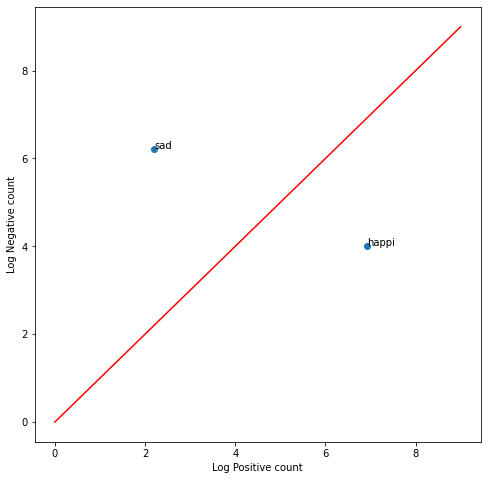

In [351]:
#Plot word vectors in a chart and see where they locate
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

### Bag of Words

In [352]:
# Corpus of tweet tokens used for the second method
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate","hate","hate","love"],
          ["happy","love","hate"],
          ["i", "lost","my","computer"],
          ["i", "am","so", "sad"]]

In [353]:
from sklearn.feature_extraction.text import CountVectorizer

In [354]:
# Create fit_cv function used to build the Bag of Words vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer= lambda x: x, preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [355]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


In [356]:
# Get the vectorizer features(matrix columns)
ft = cv_vect.get_feature_names()

In [357]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [358]:
# Convert the corpus to a matrix by using vectorizer
cv_mtx = cv_vect.transform(corpus)

In [359]:
# Print matrix shape
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [360]:
# Convert matrix to array
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [361]:
# Transform a new tweet using the vectorizer
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [362]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Term Frequency - Inverse Document Frequency(TF-IDF)

In [363]:
# Corpus of tweet tokens
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate","hate","hate","love"],
          ["happy","love","hate"],
          ["i", "lost","my","computer"],
          ["i", "am","so", "sad"]]

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [365]:
# Create a fit_tfidf function to build the TF-IDF vectorizer with the corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x:x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [366]:
#Use the fit_cv function to fit the vectorizer on the corpus , and transform the corpus
tf_vect = fit_tfidf(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


In [367]:
tf_mtx = tf_vect.transform(corpus)

In [368]:
ft = tf_vect.get_feature_names()

In [369]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [370]:
#Print the matrix shape
print(tf_mtx.shape)

(6, 13)


In [371]:
# Convert matrix to an array
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [372]:
# Transform a new tweet using the vectorizer
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

## Helper Function

In [373]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

## Train/Test Split

In [374]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['twitterus', 'not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['twitterus', 'charlen', 'love', 'miss'], ['twitterus', 'i', 'sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['twitterus', 'watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['twitterus', 'ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['twitterus', 'i', 'sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate'

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
# Use the train_test_split function to split arrays of X and y into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [377]:
# Print the size of these new variables
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


In [378]:
import random

In [379]:
# Print random tweets , just to verify
id = random.randint(0, len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['twitterus', 'chick', 'not', 'shut', 'stop', 'chirp', 'sit', 'bloodi', 'thing']
Sentiment: 0


## Logistic Regression

In [380]:
from sklearn.linear_model import LogisticRegression

In [388]:
# Create fit_lr function used to fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)
  return model

## Pos/Neg Frequency

In [382]:
freqs = build_freqs(X_train, y_train)

In [383]:
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [384]:
# Fit the Logistic Regression model
# Print the model coeffiecients
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00105183 -0.00130713]] [-9.57568643e-07]


## Count Vector

In [385]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


In [389]:
# Fit the Logistic Regression Model 
model_lr_cv = fit_lr(X_train_cv, y_train)

### TF-IDF 

In [391]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  " since 'analyzer' != 'word'")


In [392]:
model_lr_tf = fit_lr(X_train_tf, y_train)

## Performance Metrics

In [393]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Positive/Negative Frequencies

In [394]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [395]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 75.44%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

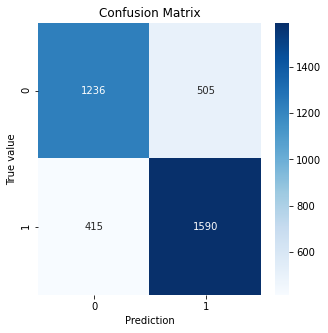

In [396]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### Count Vector

In [397]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [398]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 87.75%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

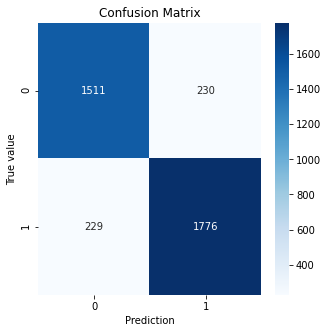

In [399]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

### TF-IDF 

In [401]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [402]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.09%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

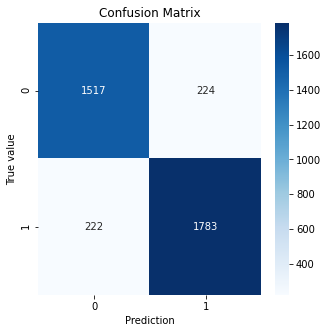

In [403]:
#Plot the confusion matrix using the plot_confusion fuction
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## Mini-Pipeline

In [404]:
your_tweet = """RT @AIOutsider: tune in for more amazing NLP content! 
And don't forget to visit https://AIOutsider.com ..."""

In [405]:
#Create a predict_tweet function used to pre-process,transform and predict tweet sentiment
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [406]:
predict_tweet(your_tweet)

Initial tweet: RT @AIOutsider: tune in for more amazing NLP content! 
And don't forget to visit https://AIOutsider.com ...
Post Twitter processing tweet: twitteruser: tune in for more amazing NLP content! 
And don't forget to visit  ...
Post Word processing tweet: twitteruser: tune in for more amazing nlp content! 
and do not forget to visit  .


'Prediction is positive sentiment'